In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

This QuTip tutorial is based on QuTip documentation that can be found at https://qutip.org/documentation.html and a collection of tutorials that can be found at https://qutip.org/qutip-tutorials/.

QuTip can be installed using
pip install qubit

### Any quantum object is represented using the class Qobj

In [2]:
x=np.array([[1],[2],[3],[4],[5]])

In [3]:
Qobj(x)

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]

Any array can be given as an input to the class Qobj

In [4]:
r=np.random.rand(4,4)

In [5]:
Qobj(r)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[0.91588323 0.90515282 0.85952766 0.92426583]
 [0.50679091 0.44652699 0.4643506  0.69229197]
 [0.93532317 0.13096937 0.48493923 0.51165565]
 [0.22234974 0.55596774 0.87063436 0.60181976]]

### Some basic quantum objects...

QuTip has a lot of in-built quantum objects. The identity matrix of dimension $n$ can be produced with qeye(n)

In [6]:
qeye(4)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

The Pauli matrices are given by sigmax(), sigmay() and sigmaz()

In [7]:
sigmay()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.-1.j]
 [0.+1.j 0.+0.j]]

In [8]:
sigmap()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0. 1.]
 [0. 0.]]

Higher dimesnionsal representations of SU(2) can be obtained by using the function jmat(). The first argument of this function gives us the matrices corresponding to the spin-j representation of SU(2). The second argument defines the kind of matrix we're interested in. For instance, we can get the spin-y matrix of the  spin-5/2 representation with

In [9]:
jmat(5/2.0,'y')

Quantum object: dims=[[6], [6]], shape=(6, 6), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j         0.-1.11803399j 0.+0.j         0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+1.11803399j 0.+0.j         0.-1.41421356j 0.+0.j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+1.41421356j 0.+0.j         0.-1.5j
  0.+0.j         0.+0.j        ]
 [0.+0.j         0.+0.j         0.+1.5j        0.+0.j
  0.-1.41421356j 0.+0.j        ]
 [0.+0.j         0.+0.j         0.+0.j         0.+1.41421356j
  0.+0.j         0.-1.11803399j]
 [0.+0.j         0.+0.j         0.+0.j         0.+0.j
  0.+1.11803399j 0.+0.j        ]]

QuTip also has in-built functions to produce Fock states of any dimension

In [10]:
basis(4,2)

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [0.]
 [1.]
 [0.]]

In [11]:
fock(4)

Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [12]:
coherent(5,2+1j*2)

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[ 1.86485193e-01+1.67040222e-17j]
 [-2.27571703e-01-2.27571703e-01j]
 [-5.02018222e-18+6.05218435e-01j]
 [ 2.22415436e-01-2.22415436e-01j]
 [-6.29618064e-01-1.07361049e-17j]]

There are many more in-built objects of the class Qobj that one can explore like position(n) and momentum(n) that gives us an d-dimensional truncation of the inifnite dimensional position and momentum operators respectively. We refer the interested reader to https://qutip.org/documentation.html for a comprehensive list of in-built functions.

In [13]:
momentum(4)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0.+0.j         0.-0.70710678j 0.+0.j         0.+0.j        ]
 [0.+0.70710678j 0.+0.j         0.-1.j         0.+0.j        ]
 [0.+0.j         0.+1.j         0.+0.j         0.-1.22474487j]
 [0.+0.j         0.+0.j         0.+1.22474487j 0.+0.j        ]]

### Operations on Qobj

One can perform algebraic operations on objects of the class Qobj. As an example, below, we define a quantum object y.

In [14]:
y=Qobj([[1+2*1j],[2-2*1j],[3],[4],[5]])

In [15]:
y

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.+2.j]
 [2.-2.j]
 [3.+0.j]
 [4.+0.j]
 [5.+0.j]]

The hermitian conjugate of this object can simply be obtained by

In [16]:
y.dag()

Quantum object: dims=[[1], [5]], shape=(1, 5), type='bra', dtype=Dense
Qobj data =
[[1.-2.j 2.+2.j 3.-0.j 4.-0.j 5.-0.j]]

One can compute the matrix product of quantum objects by simply using the * operation as one does for numbers. Below, we compute the expectation value of the position operator for y.

In [17]:
(y.dag())*position(5)*y

(95.13399228357576+0j)

One can obtain tensor products of quantum objects by simply using the tensor() function

In [18]:
tensor(sigmax(),sigmay())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]

In [19]:
sz=sigmaz()
sz

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

Qobj also has a collection of in-built attribute functions that allow one to check if the object of interest in hermitian or unitary, to compute the eigenstates, eigenvalues etc. Below, we take 10-dimensional truncations of the position and momentum operators for our playground. 

In [20]:
p=momentum(10)
x=position(10)

In [21]:
x.isherm

True

In [22]:
x.isunitary

False

Consider the commutator of the Pauli matrices $\sigma_x$ and $\sigma_y$.

In [23]:
sigmax()*sigmay()-sigmay()*sigmax()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

We see that the result is proportional to $\sigma_z$ as expected. QuTip has an inbuilt function to calculate the commutator of two quantum objects 

In [24]:
commutator(sigmax(),sigmay())

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=False
Qobj data =
[[0.+2.j 0.+0.j]
 [0.+0.j 0.-2.j]]

One can compute the anti-commutator by adding an extra argument to the function

In [25]:
commutator(sigmax(),sigmay(),"anti")

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0.]
 [0. 0.]]

We can compute the commutator of position and momentum to be:

In [26]:
commutator(x,p)

Quantum object: dims=[[10], [10]], shape=(10, 10), type='oper', dtype=Dia, isherm=False
Qobj data =
[[0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-9.j]]

The commutator of the infinite dimensional position and momentum operators is 1j times the identity operator. Above, we get a diagonal matrix with all entries except the lasta one equal to 1j. This isn't surprising as we're working with truncated finite dimensional expressions for the position and momentum operators.

We can also compute the eigenstates and eigenvectors of a quantum object when applicate. 

In [27]:
x2=Qobj([[2,1,0,0],[1,2,0,0],[0,0,3,0],[0,0,0,3]])

In [28]:
x2.eigenstates()

(array([1., 3., 3., 3.]),
 array([Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[ 0.70710678]
         [-0.70710678]
         [ 0.        ]
         [ 0.        ]]                                                       ,
        Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[0.70710678]
         [0.70710678]
         [0.        ]
         [0.        ]]                                                        ,
        Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[0.]
         [0.]
         [1.]
         [0.]]                                                                ,
        Quantum object: dims=[[4], [1]], shape=(4, 1), type='ket', dtype=Dense
        Qobj data =
        [[0.]
         [0.]
         [0.]
         [1.]]                                                                ],
       dtype=object))

### Simple Harmonic Oscillator

As a fun aside, we analyze the quantum simple harmonic oscillator. The Hamiltonian, which represents the energy of the system, is given by

In [29]:
Hsim=(1/2)*p*p+(1/2)*x*x

Here, x and p are the 10-dimensional approximations of position and momentum operators that we defined previously. We set the mass and frequency to be equal to 1. QuTip natively sets $\hbar=1$.

In [30]:
Hsim.isherm

True

In [31]:
Hsim.isunitary

False

We see that our Hamiltonian is hermitian, but not unitary, as expected. The energy spectrum of the Hamiltonian can be obtained by calculating the eigenvalues of the Hamiltonian.

In [32]:
Hsim.eigenenergies()

array([0.5, 1.5, 2.5, 3.5, 4.5, 4.5, 5.5, 6.5, 7.5, 8.5])

We see that we only get 9 eigenvalues of the Hamiltonian even though the dimension of the operator was 10. This is because we're working with a 10 dimensional approximation of the infinite dimensional operator. As such, the last eigenvalue won't be accurate.

We can also obtain the eigenstates of the system. This automatically also gives us the eigenvalues

In [33]:
Hsim.eigenstates()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 array([Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
        Qobj data =
        [[1.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]]                                                                  ,
        Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
        Qobj data =
        [[0.]
         [1.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]]                                                                  ,
        Quantum object: dims=[[10], [1]], shape=(10, 1), type='ket', dtype=Dense
        Qobj data =
        [[0.]
         [0.]
         [1.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]
         [0.]]                                                                  ,
        Quant

### Operations with density matrices

QuTip also has in-built functions to construct density matrices. For instance, the density matrix for a fock state or coherent state are given by

In [34]:
fock_dm(4,2)

Quantum object: dims=[[4], [4]], shape=(4, 4), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]

In [35]:
coherent_dm(2,2+1j*2)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.9050918 +0.j         -0.20724458+0.20724458j]
 [-0.20724458-0.20724458j  0.0949082 +0.j        ]]

We can also construct the density matrix corresponding to any state vector using ket2dm()

In [36]:
y

Quantum object: dims=[[5], [1]], shape=(5, 1), type='ket', dtype=Dense
Qobj data =
[[1.+2.j]
 [2.-2.j]
 [3.+0.j]
 [4.+0.j]
 [5.+0.j]]

In [37]:
ket2dm(y)

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 5. +0.j -2. +6.j  3. +6.j  4. +8.j  5.+10.j]
 [-2. -6.j  8. +0.j  6. -6.j  8. -8.j 10.-10.j]
 [ 3. -6.j  6. +6.j  9. +0.j 12. +0.j 15. +0.j]
 [ 4. -8.j  8. +8.j 12. +0.j 16. +0.j 20. +0.j]
 [ 5.-10.j 10.+10.j 15. +0.j 20. +0.j 25. +0.j]]

This is just equal to y*y.dag()

In [38]:
y*y.dag()

Quantum object: dims=[[5], [5]], shape=(5, 5), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 5. +0.j -2. +6.j  3. +6.j  4. +8.j  5.+10.j]
 [-2. -6.j  8. +0.j  6. -6.j  8. -8.j 10.-10.j]
 [ 3. -6.j  6. +6.j  9. +0.j 12. +0.j 15. +0.j]
 [ 4. -8.j  8. +8.j 12. +0.j 16. +0.j 20. +0.j]
 [ 5.-10.j 10.+10.j 15. +0.j 20. +0.j 25. +0.j]]

One can also compute partial traces for density matrices using ptrace(). Below, we define an arbitrary matrix and compute the partial trace along qubit 0

In [39]:
tensor(sigmax(),qeye(2))

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

In [40]:
tensor(sigmax(),qeye(2)).ptrace(0)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 2.]
 [2. 0.]]

QuTip also allows for more complex operations on density matrices like getting the Kraus representation of the density operators. We refer the reader to the documentation of QuTip for more details on this.

### Circuits and Gates

We now move on to a brief illustration of circuits and gates in QuTip. One needs to install qutip_qip to perform circuit operations. This can be done using pip

In [41]:
from qutip_qip.circuit import *
from qutip_qip.operations import *

QuTip comes with a built-in set of gates. For example, the CNOT gate is given by

In [42]:
cnot()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

The Hadamard gate is given by

In [43]:
snot()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

One can get the phase get by using cphase(). One needs to provide the phase angle as an argument for this gate

In [44]:
cphase(np.pi / 2)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 1.000000e+00+0.j 0.000000e+00+0.j]
 [0.000000e+00+0.j 0.000000e+00+0.j 0.000000e+00+0.j 6.123234e-17+1.j]]

We also have in-built functions for performing rotations with the Pauli matrices. For example, the gate corresponding to a rotation about $\sigma_x$ by $\pi$ radians is given by

In [45]:
rx(np.pi)

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[6.123234e-17+0.j 0.000000e+00-1.j]
 [0.000000e+00-1.j 6.123234e-17+0.j]]

In [46]:
rotGen=Qobj([[0,1],[-1,0]])
rotGen

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 0.  1.]
 [-1.  0.]]

In [47]:
((np.pi/2)*rotGen).expm()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
Qobj data =
[[ 6.123234e-17  1.000000e+00]
 [-1.000000e+00  6.123234e-17]]

Below, we define a two-qubit circuit and add two gates to the circuit.

In [48]:
q1=QubitCircuit(2)

q1.add_gate("CNOT",targets=[1], controls=[0])
q1.add_gate("X",targets=[1])

The list of unitary operations corresponding to the application of the gates can be obtained by using propagators()

In [49]:
q1.propagators()

[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[0. 1. 0. 0.]
  [1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]]]

The net unitary transformation corresponding to the application of all the gates is given by

In [50]:
gate_sequence_product(q1.propagators())

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

We can try to decompose any unitary gate of interest in terms of a set of basis gates by using resolve_gates(). By default, this decomposes the gate in terms of CNOT, RX, RY and RZ gates. One can change the basis set by giving the desired set of basis gates as arguments for this function. Below, we show how to do it for the SWAP gate

In [51]:
q2=QubitCircuit(2)

q2.add_gate("SWAP", [0,1])

In [52]:
q2.propagators()

[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]]]

In [53]:
(q2.resolve_gates()).propagators()

[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]],
 Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
 Qobj data =
 [[1. 0. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]]]

As expected, we can decompose the SWAP gate as a product of CNOT gates. Below, we reproduce the CNOT gate matrices with different control qubits for comparision.

In [54]:
cnot(control=0,target=1)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [55]:
cnot(control=1,target=0)

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

### Evolution under a Hamiltonian

QuTip comes equipped with a collection of built-in solvers to calculate/simulate the evolution of a state or denstiy matrix under a Hamiltonian. As an example, we demonstrate how to do this for Jaynes-Cummins model, which consists of an atom placed inside a cavity.

$H = w_c  a^{\dagger} a + \frac{1}{2}w_a \sigma_{+} \sigma_{-}+g\left( a^{\dagger} \sigma_{-}+ a \sigma_{+}\right)$$

Here, the first term corresponds to the photon field, the second term corresponds to the atom, and the third term corresponds to the interactions between cavity and the atom.

We take a 10-dimensional approximation and simulate the system from time $t=0$ to $t=10$. 

In [56]:
N = 10  
wc = 2*np.pi 
wa = np.pi
g = np.pi

tlist = np.linspace(0, 10, 1000)

We can define creation/annihilation operators and the Pauli matrices by using built-in functions. Note that the terms in the Hamiltonian involve tensor products between operators that act on the atom and operators that act of the photon field. We first simulate the system where there's no interaction between the cavity and the atom.

In [57]:
psi0 = tensor(basis(N, 0), basis(2, 0))

a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2).dag())
sz = tensor(qeye(N), sigmax())

H1 = wc * a.dag() * a + wa / 2 * sz

The solver requires us to give it the Hamiltonian of the system, the state or density matrix to evolve, the list of times to evolve it over, and a list of operators for which to calculate expectation values.

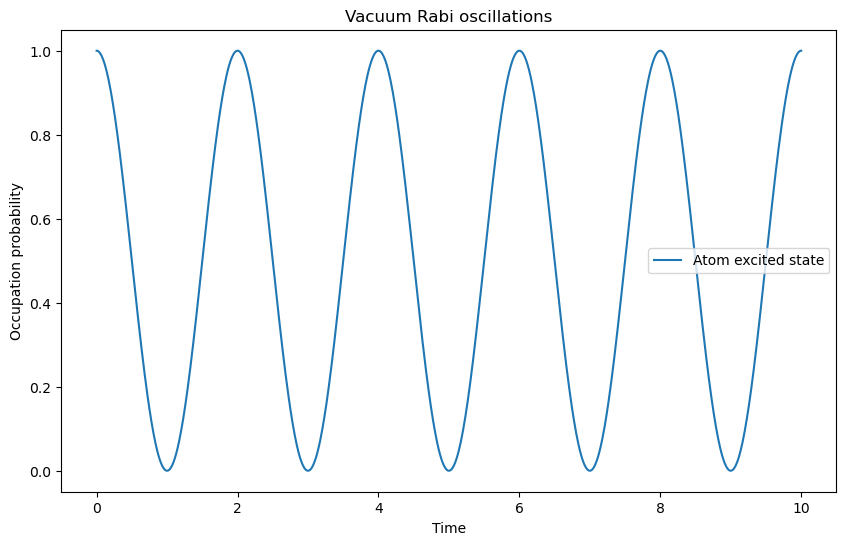

In [58]:
output1 = mesolve(H1, psi0, tlist,e_ops= [a.dag() * a, sm.dag() * sm])

n_a = output1.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(tlist, n_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi oscillations");

We see oscillations between the ground and excited states of the atom as expected.

Now, we simulate the case where there are interactions between the atom and the cavity.

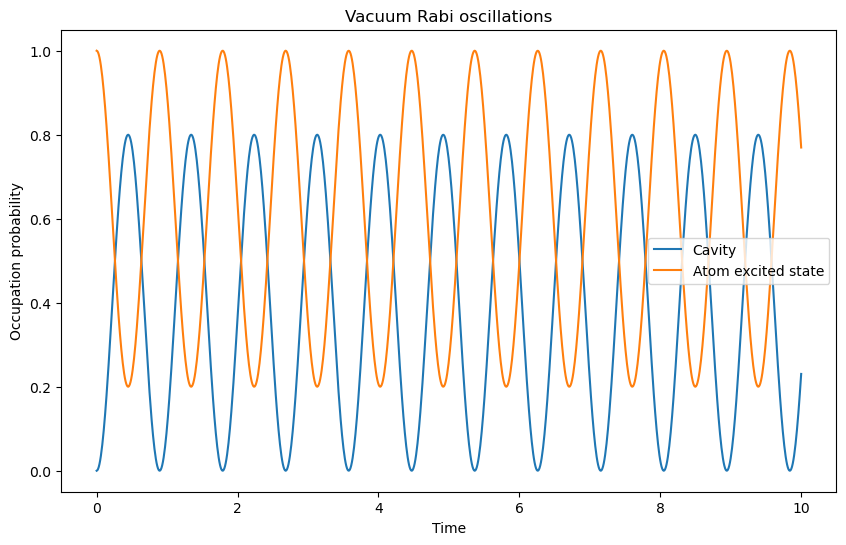

In [59]:
H2 = H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
output2 = mesolve(H2, psi0, tlist,e_ops= [a.dag() * a, sm.dag() * sm])

n2_c = output2.expect[0]
n2_a = output2.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(tlist, n2_c, label="Cavity")
axes.plot(tlist, n2_a, label="Atom excited state")
axes.legend(loc=0)
axes.set_xlabel("Time")
axes.set_ylabel("Occupation probability")
axes.set_title("Vacuum Rabi oscillations");

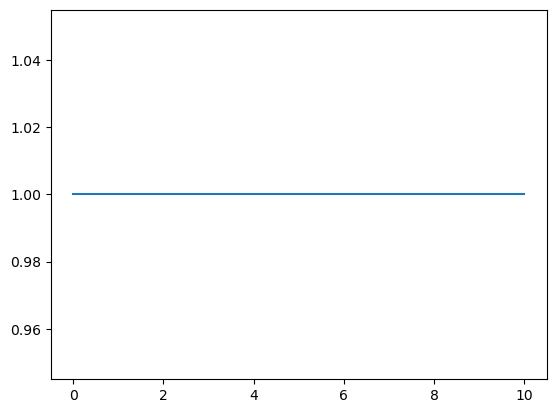

In [60]:
plt.plot(tlist, n2_c+n2_a)

The occupation probabilities of both the atom excited states and cavity oscillate, but the net occupation probability stays constant as the energy keeps being exchanged between the atom and the cavity. We looked at the evolution of a state vector above. QuTip also allows for simulating the evolution of a density matrix. While we chose a time-independent Hamiltonian for our demonstration above, QuTip also allows for simulating the evolution of states/denstiy matrices over time-dependent Hamiltonians.

### Optimal control using GRadient Ascent Pulse Engineering (GRAPE) algorithm 

Finally, we move on to demonstrate the implementation of the GRAPE algorithm in QuTip. For this part, we also need to install qutip.control and qutip.control.grape

To implement a unitary gate on a circuit, one needs to decompose the unitary gate in terms of a set of basis gates. For instance, in a physical system with neutral atoms that can get excited by lasers, the required unitary transformation is obtained by sending a series of pulses. We saw above how a SWAP gate can be decomposed in terms of three CNOT gates. However, for an arbitrary unitary transformation, this decomposition can be highly non-trivial. The GRAPE algorithm solves this problem by assuming a series of pulses and trying to find for the optimal set through gradient descent. The qutip.control allows one to find a solution using the GRAPE algorithm.

In [61]:
import matplotlib.pyplot as plt
import time
import numpy as np
from qutip import *
from qutip.control import *
from qutip_qip.circuit import *
from qutip_qip.operations import *
from qutip.control.grape import plot_grape_control_fields, _overlap, grape_unitary_adaptive, cy_grape_unitary

The function for the GRAPE algorithm requires as arguments the unitary matrix that we're trying to achieve, the background Hamiltonian over which the system evolves without the pulses, the set of basis gates, the number of pulses, the initial values for the pulses and the timestamps where we're applying the pulses .

For our demonstration, we choose the CNOT gate as our target unitary gate. We take the basis gates, $H_{ops}$, to be the Pauli matrices acting on each individal qubits, i.e. we take them to be $\sigma_i \bigotimes I$ and $I \bigotimes \sigma_i$. We set the number of "pulses" to be 500. To make the problem simple, we set the background Hamiltonian to zero. We initialize the initial values of the pulses for each gate to be random values.

In [62]:
U = cnot()
R = 500
times = np.linspace(0,2 * np.pi , R)
H_ops = [tensor(sigmax(), identity(2)),
         tensor(sigmay(), identity(2)),
         tensor(sigmaz(), identity(2)),
         tensor(identity(2), sigmax()),
         tensor(identity(2), sigmay()),
         tensor(identity(2), sigmaz())]

H_labels = [r'$u_{1x}$', r'$u_{1y}$', r'$u_{1z}$', r'$u_{2x}$', r'$u_{1y}$', r'$u_{2z}$']

H0 = 0 * tensor(qeye(2),qeye(2))
u0 = np.array([np.random.rand(len(times)) * 2 * np.pi * 0.05 for _ in range(len(H_ops))])


result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0)

We plot the results below.

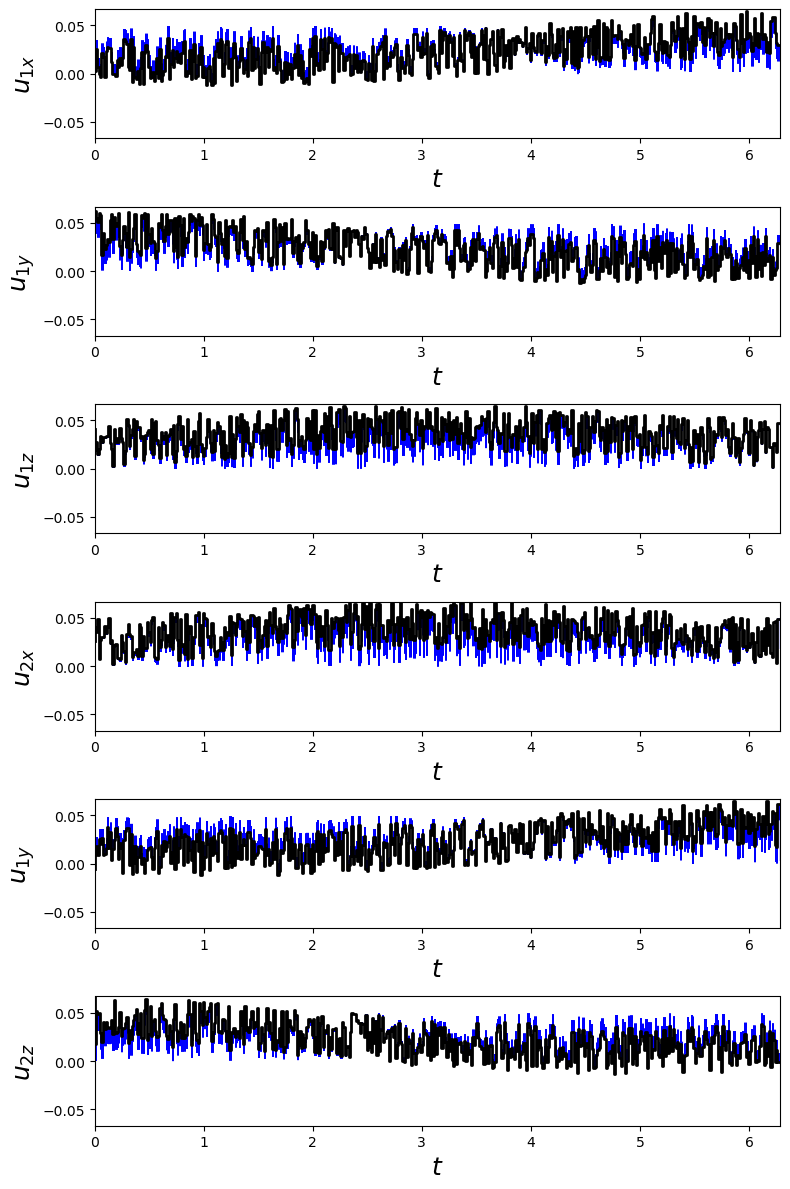

In [63]:
plot_grape_control_fields(times, result.u / (2 * np.pi), H_labels, uniform_axes=True);

The resultant unitary gate we got can be seen using

In [64]:
result.U_f

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=False
Qobj data =
[[-0.05627368+0.27609366j -0.86596776+0.37255659j  0.01796094+0.04789712j
  -0.0972957 +0.14079704j]
 [-0.93589078+0.11316809j  0.18741771+0.21040208j -0.13305916+0.10763606j
   0.04911516+0.01429792j]
 [-0.04911516+0.01429792j -0.13305916-0.10763606j  0.18741771-0.21040208j
   0.93589078+0.11316809j]
 [-0.0972957 -0.14079704j -0.01796094+0.04789712j  0.86596776+0.37255659j
  -0.05627368-0.27609366j]]

The fidelity of our final gate is given by

In [65]:
_overlap(U, result.U_f)

(0.48325064343386803+0.24305510605499253j)

We see that the fidelity we obtained is not very good. We can improve upon this by starting with a bigger set of basis gates, allowing for a greater number of pulses and choosing the initial values of the pulses more carefully.